In [1]:
import tensorflow.keras as keras; 
import tensorflow as tf; 

import numpy as np
import pandas as pd
from matplotlib import pyplot

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

print("Versão Keras :" , keras.__version__)
print("Versão Tensorflow :" , tf.__version__)

Versão Keras : 2.2.4-tf
Versão Tensorflow : 2.1.0


## Parâmetros de uma Rede Neural com Keras

## Otimizadores (http://keras.io/optimizers/)
* SGD (Stochastic gradient descent).

* RMSProp

## Versão de otimizador com adaptação de parâmetros:

* Adagrad

* Adadelta

* Adam

* Adamax

* Nadam



## Funções de Loss (https://keras.io/losses/)

### Loss para regressão
* mean_squared_error
* mean_absolute_error
* mean_absolute_percentage_error
* mean_squared_logarithmic_error

### Loss para classificação
* categorical_crossentropy
* sparse_categorical_crossentropy
* binary_crossentropy

### Outras opções de loss
* squared_hinge
* hinge
* categorical_hinge
* logcosh
* huber_loss
* kullback_leibler_divergence
* poisson
* cosine_proximity
* is_categorical_crossentropy



## Camadas (https://keras.io/layers/core/)
* Dense
* Dropout

## Funções de Ativação (https://keras.io/activations/)

* elu
* relu
* linear
* tahn
* exponential

* Classificação linear
    * hard_sigmoid
    * sigmoid

* ativação para camadas de classificação
    * softsign
    * softmax

## Métricas (https://keras.io/metrics/)

* accuracy
* binary_accuracy
* categorical_accuracy
* sparse_categorical_accuracy
* top_k_categorical_accuracy
* sparse_top_k_categorical_accuracy
* cosine_proximity
* clone_metric

## Cocamar

In [14]:
!ls ../datasets/cocamar/db

e1.csv	e2.csv	e3.csv	e4.csv	e5.csv	e6.csv	e7.csv


In [47]:
import random

df7 = pd.read_csv('../datasets/cocamar/db/e5.csv')
#df7
dfCultur=df7.loc[df7["codcult"]==16]
#safras=dfCultur["safra"].unique()
#print(safras)
#safrastrain=random.sample(safras,k=4)

#safrastrain


y=df['delta']
X=df.drop(['delta'], axis=1)
print(df)
print(y.shape)
print(X.shape)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

     codcult  safra     e1    n7tmed   p7tmax   p7tmin      p7ur    p7nprec  \
0         16      1   1.89  24.66250  31.7125  17.6125  48.18750  -0.000000   
1         16      1   0.13  20.98125  25.2750  16.6875  79.43750 -28.571429   
2         16      1  12.08  21.43125  28.1625  14.7000  60.43750 -28.571429   
3         16      1  47.40  23.25000  29.2500  17.2500  67.25000 -42.857143   
4         16      1  79.06  24.44375  30.9250  17.9625  58.90625  -0.000000   
..       ...    ...    ...       ...      ...      ...       ...        ...   
231      120     16  99.99  18.54375  24.8000  12.2875  53.31250  -0.000000   
232       18     18   6.53  24.78750  30.1125  19.4625  64.40625  -0.000000   
233       18     18  12.83  24.98750  29.4250  20.5500  74.03125 -28.571429   
234       18     18  76.97  24.14375  28.4500  19.8375  76.40625 -14.285714   
235      120      6   4.43  22.91875  27.5375  18.3000  89.65625 -57.142857   

     p7sprec    p7tmed  ...      p28ur   p28nprec  

## Criar uma função de divisão entre treino e teste


In [3]:
import pandas as pd

df = pd.read_csv('../datasets/cocamar/db/e1.csv')

dfCultur=df.loc[df["codcult"]==16]

y=df['delta']
X=df.drop(['delta'], axis=1)
print(df)
print(y.shape)
print(X.shape)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

     codcult  safra     e1    n7tmed   p7tmax   p7tmin      p7ur    p7nprec  \
0         16      1   1.89  24.66250  31.7125  17.6125  48.18750  -0.000000   
1         16      1   0.13  20.98125  25.2750  16.6875  79.43750 -28.571429   
2         16      1  12.08  21.43125  28.1625  14.7000  60.43750 -28.571429   
3         16      1  47.40  23.25000  29.2500  17.2500  67.25000 -42.857143   
4         16      1  79.06  24.44375  30.9250  17.9625  58.90625  -0.000000   
..       ...    ...    ...       ...      ...      ...       ...        ...   
231      120     16  99.99  18.54375  24.8000  12.2875  53.31250  -0.000000   
232       18     18   6.53  24.78750  30.1125  19.4625  64.40625  -0.000000   
233       18     18  12.83  24.98750  29.4250  20.5500  74.03125 -28.571429   
234       18     18  76.97  24.14375  28.4500  19.8375  76.40625 -14.285714   
235      120      6   4.43  22.91875  27.5375  18.3000  89.65625 -57.142857   

     p7sprec    p7tmed  ...      p28ur   p28nprec  

In [9]:
dfCultur=df.loc[df["codcult"]==16]
dfCultur

,codcult,safra,e1,n7tmed,p7tmax,p7tmin,p7ur,p7nprec,p7sprec,p7tmed,...,p28ur,p28nprec,p28sprec,n28tmed,n28tmax,n28tmin,n28ur,n28nprec,n28sprec,delta
0,16,1,1.89,24.66250,31.7125,17.6125,48.18750,-0.000000,0.0,25.64375,...,45.318966,-0.000000,2.1,22.175862,27.724138,16.627586,68.586207,21.428571,191.4,162
1,16,1,0.13,20.98125,25.2750,16.6875,79.43750,-28.571429,54.4,21.43125,...,66.439655,-21.428571,191.4,22.924138,29.296552,16.551724,62.172414,21.428571,178.6,140
2,16,1,12.08,21.43125,28.1625,14.7000,60.43750,-28.571429,39.6,23.25000,...,69.629310,-25.000000,201.8,23.581034,29.824138,17.337931,63.991379,25.000000,179.2,135
3,16,1,47.40,23.25000,29.2500,17.2500,67.25000,-42.857143,65.2,24.44375,...,72.551724,-32.142857,256.6,23.420690,29.772414,17.068966,63.034483,17.857143,145.6,138
4,16,1,79.06,24.44375,30.9250,17.9625,58.90625,-0.000000,7.8,23.56875,...,66.405172,-17.857143,127.4,23.596552,29.706897,17.486207,65.525862,25.000000,169.7,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,16,19,131.53,25.96250,30.6250,21.3000,71.62500,-28.571429,56.9,26.05000,...,75.241379,-35.714286,283.9,25.658621,30.031034,21.286207,75.508621,21.428571,217.2,55
172,16,19,131.53,26.05000,29.8125,22.2875,83.68750,-42.857143,102.8,26.06250,...,76.439655,-39.285714,331.0,25.589655,30.075862,21.103448,72.775862,14.285714,128.0,48
173,16,19,131.53,26.06250,30.5375,21.5875,73.31250,-28.571429,33.3,24.99375,...,72.465517,-21.428571,189.2,25.727586,30.541379,20.913793,68.922414,7.142857,94.7,41
174,16,19,131.53,24.99375,30.1500,19.8375,65.03125,-0.000000,8.4,25.81250,...,73.474138,-21.428571,188.6,26.305172,31.317241,21.293103,69.551724,7.142857,103.5,34


In [48]:
# define and fit the final model
model = Sequential()
model.add(Dense(16, input_dim=39, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

history = model.fit(x_train, y_train, epochs=4000, verbose=1)

Train on 188 samples
Epoch 1/4000
188/188 [==============================] - 0s 1ms/sample - loss: 25601.5932 - mse: 25601.5938
Epoch 2/4000
188/188 [==============================] - 0s 102us/sample - loss: 13413.7496 - mse: 13413.7500
Epoch 3/4000
188/188 [==============================] - 0s 124us/sample - loss: 6303.1891 - mse: 6303.1890
Epoch 4/4000
188/188 [==============================] - 0s 129us/sample - loss: 3215.2879 - mse: 3215.2878
Epoch 5/4000
188/188 [==============================] - 0s 134us/sample - loss: 2870.8457 - mse: 2870.8457
Epoch 6/4000
188/188 [==============================] - 0s 134us/sample - loss: 3082.9312 - mse: 3082.9312
Epoch 7/4000
188/188 [==============================] - 0s 138us/sample - loss: 2869.5836 - mse: 2869.5837
Epoch 8/4000
188/188 [==============================] - 0s 135us/sample - loss: 2510.7038 - mse: 2510.7039
Epoch 9/4000
188/188 [==============================] - 0s 137us/sample - loss: 2330.9297 - mse: 2330.9297
Epoch 10/4000


188/188 [==============================] - 0s 149us/sample - loss: 514.7647 - mse: 514.7648
Epoch 78/4000
188/188 [==============================] - 0s 142us/sample - loss: 516.1422 - mse: 516.1422
Epoch 79/4000
188/188 [==============================] - 0s 143us/sample - loss: 514.4737 - mse: 514.4738
Epoch 80/4000
188/188 [==============================] - 0s 146us/sample - loss: 511.2142 - mse: 511.2142
Epoch 81/4000
188/188 [==============================] - 0s 150us/sample - loss: 508.4656 - mse: 508.4656
Epoch 82/4000
188/188 [==============================] - 0s 145us/sample - loss: 509.6164 - mse: 509.6164
Epoch 83/4000
188/188 [==============================] - 0s 148us/sample - loss: 503.3947 - mse: 503.3947
Epoch 84/4000
188/188 [==============================] - 0s 146us/sample - loss: 504.2443 - mse: 504.2442
Epoch 85/4000
188/188 [==============================] - 0s 185us/sample - loss: 500.8461 - mse: 500.8462
Epoch 86/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 147us/sample - loss: 415.2180 - mse: 415.2180
Epoch 154/4000
188/188 [==============================] - 0s 151us/sample - loss: 413.3852 - mse: 413.3851
Epoch 155/4000
188/188 [==============================] - 0s 148us/sample - loss: 420.4328 - mse: 420.4328
Epoch 156/4000
188/188 [==============================] - 0s 148us/sample - loss: 417.2730 - mse: 417.2730
Epoch 157/4000
188/188 [==============================] - 0s 145us/sample - loss: 423.3958 - mse: 423.3958
Epoch 158/4000
188/188 [==============================] - 0s 149us/sample - loss: 418.5694 - mse: 418.5694
Epoch 159/4000
188/188 [==============================] - 0s 142us/sample - loss: 407.3694 - mse: 407.3694
Epoch 160/4000
188/188 [==============================] - 0s 146us/sample - loss: 414.5528 - mse: 414.5528
Epoch 161/4000
188/188 [==============================] - 0s 144us/sample - loss: 409.4806 - mse: 409.4806
Epoch 162/4000
188/188 [============================

188/188 [==============================] - 0s 145us/sample - loss: 336.2000 - mse: 336.2000
Epoch 230/4000
188/188 [==============================] - 0s 148us/sample - loss: 343.9527 - mse: 343.9527
Epoch 231/4000
188/188 [==============================] - 0s 148us/sample - loss: 370.2843 - mse: 370.2843
Epoch 232/4000
188/188 [==============================] - 0s 142us/sample - loss: 376.8568 - mse: 376.8568
Epoch 233/4000
188/188 [==============================] - 0s 146us/sample - loss: 336.8122 - mse: 336.8122
Epoch 234/4000
188/188 [==============================] - 0s 144us/sample - loss: 344.0898 - mse: 344.0898
Epoch 235/4000
188/188 [==============================] - 0s 141us/sample - loss: 338.5945 - mse: 338.5945
Epoch 236/4000
188/188 [==============================] - 0s 147us/sample - loss: 333.6049 - mse: 333.6049
Epoch 237/4000
188/188 [==============================] - 0s 146us/sample - loss: 333.9441 - mse: 333.9441
Epoch 238/4000
188/188 [============================

188/188 [==============================] - 0s 149us/sample - loss: 293.6189 - mse: 293.6189
Epoch 306/4000
188/188 [==============================] - 0s 144us/sample - loss: 295.3771 - mse: 295.3771
Epoch 307/4000
188/188 [==============================] - 0s 150us/sample - loss: 295.7508 - mse: 295.7508
Epoch 308/4000
188/188 [==============================] - 0s 149us/sample - loss: 298.7713 - mse: 298.7713
Epoch 309/4000
188/188 [==============================] - 0s 147us/sample - loss: 287.8762 - mse: 287.8762
Epoch 310/4000
188/188 [==============================] - 0s 146us/sample - loss: 289.8924 - mse: 289.8924
Epoch 311/4000
188/188 [==============================] - 0s 146us/sample - loss: 285.7086 - mse: 285.7086
Epoch 312/4000
188/188 [==============================] - 0s 144us/sample - loss: 290.4021 - mse: 290.4021
Epoch 313/4000
188/188 [==============================] - 0s 145us/sample - loss: 290.8761 - mse: 290.8762
Epoch 314/4000
188/188 [============================

188/188 [==============================] - 0s 147us/sample - loss: 259.0274 - mse: 259.0274
Epoch 382/4000
188/188 [==============================] - 0s 148us/sample - loss: 253.9968 - mse: 253.9968
Epoch 383/4000
188/188 [==============================] - 0s 149us/sample - loss: 256.0160 - mse: 256.0160
Epoch 384/4000
188/188 [==============================] - 0s 147us/sample - loss: 269.9921 - mse: 269.9921
Epoch 385/4000
188/188 [==============================] - 0s 146us/sample - loss: 261.6975 - mse: 261.6975
Epoch 386/4000
188/188 [==============================] - 0s 146us/sample - loss: 255.5297 - mse: 255.5297
Epoch 387/4000
188/188 [==============================] - 0s 147us/sample - loss: 263.9123 - mse: 263.9123
Epoch 388/4000
188/188 [==============================] - 0s 150us/sample - loss: 257.3881 - mse: 257.3881
Epoch 389/4000
188/188 [==============================] - 0s 145us/sample - loss: 255.3260 - mse: 255.3260
Epoch 390/4000
188/188 [============================

188/188 [==============================] - 0s 151us/sample - loss: 223.1164 - mse: 223.1164
Epoch 458/4000
188/188 [==============================] - 0s 148us/sample - loss: 239.0490 - mse: 239.0490
Epoch 459/4000
188/188 [==============================] - 0s 145us/sample - loss: 230.1355 - mse: 230.1356
Epoch 460/4000
188/188 [==============================] - 0s 152us/sample - loss: 223.6775 - mse: 223.6775
Epoch 461/4000
188/188 [==============================] - 0s 144us/sample - loss: 225.0257 - mse: 225.0257
Epoch 462/4000
188/188 [==============================] - 0s 149us/sample - loss: 225.2347 - mse: 225.2347
Epoch 463/4000
188/188 [==============================] - 0s 146us/sample - loss: 221.4807 - mse: 221.4807
Epoch 464/4000
188/188 [==============================] - 0s 154us/sample - loss: 234.2378 - mse: 234.2378
Epoch 465/4000
188/188 [==============================] - 0s 147us/sample - loss: 225.7643 - mse: 225.7643
Epoch 466/4000
188/188 [============================

188/188 [==============================] - 0s 143us/sample - loss: 195.7135 - mse: 195.7135
Epoch 534/4000
188/188 [==============================] - 0s 148us/sample - loss: 199.0501 - mse: 199.0501
Epoch 535/4000
188/188 [==============================] - 0s 146us/sample - loss: 197.2317 - mse: 197.2317
Epoch 536/4000
188/188 [==============================] - 0s 147us/sample - loss: 193.8068 - mse: 193.8068
Epoch 537/4000
188/188 [==============================] - 0s 143us/sample - loss: 196.2513 - mse: 196.2513
Epoch 538/4000
188/188 [==============================] - 0s 142us/sample - loss: 201.8778 - mse: 201.8778
Epoch 539/4000
188/188 [==============================] - 0s 143us/sample - loss: 203.7336 - mse: 203.7336
Epoch 540/4000
188/188 [==============================] - 0s 147us/sample - loss: 203.9914 - mse: 203.9914
Epoch 541/4000
188/188 [==============================] - 0s 147us/sample - loss: 206.6257 - mse: 206.6257
Epoch 542/4000
188/188 [============================

188/188 [==============================] - 0s 144us/sample - loss: 179.7054 - mse: 179.7054
Epoch 610/4000
188/188 [==============================] - 0s 144us/sample - loss: 187.3893 - mse: 187.3893
Epoch 611/4000
188/188 [==============================] - 0s 147us/sample - loss: 192.4756 - mse: 192.4756
Epoch 612/4000
188/188 [==============================] - 0s 166us/sample - loss: 190.7364 - mse: 190.7364
Epoch 613/4000
188/188 [==============================] - 0s 156us/sample - loss: 183.3473 - mse: 183.3473
Epoch 614/4000
188/188 [==============================] - 0s 147us/sample - loss: 171.5172 - mse: 171.5172
Epoch 615/4000
188/188 [==============================] - 0s 147us/sample - loss: 173.4226 - mse: 173.4226
Epoch 616/4000
188/188 [==============================] - 0s 147us/sample - loss: 173.9581 - mse: 173.9581
Epoch 617/4000
188/188 [==============================] - 0s 150us/sample - loss: 171.3137 - mse: 171.3137
Epoch 618/4000
188/188 [============================

188/188 [==============================] - 0s 145us/sample - loss: 158.2394 - mse: 158.2394
Epoch 686/4000
188/188 [==============================] - 0s 138us/sample - loss: 163.2729 - mse: 163.2729
Epoch 687/4000
188/188 [==============================] - 0s 142us/sample - loss: 169.0936 - mse: 169.0936
Epoch 688/4000
188/188 [==============================] - 0s 144us/sample - loss: 158.5566 - mse: 158.5566
Epoch 689/4000
188/188 [==============================] - 0s 145us/sample - loss: 154.1518 - mse: 154.1517
Epoch 690/4000
188/188 [==============================] - 0s 144us/sample - loss: 157.0493 - mse: 157.0493
Epoch 691/4000
188/188 [==============================] - 0s 144us/sample - loss: 156.1478 - mse: 156.1478
Epoch 692/4000
188/188 [==============================] - 0s 150us/sample - loss: 155.1932 - mse: 155.1932
Epoch 693/4000
188/188 [==============================] - 0s 146us/sample - loss: 158.1915 - mse: 158.1915
Epoch 694/4000
188/188 [============================

188/188 [==============================] - 0s 149us/sample - loss: 151.3962 - mse: 151.3962
Epoch 762/4000
188/188 [==============================] - 0s 148us/sample - loss: 154.8721 - mse: 154.8721
Epoch 763/4000
188/188 [==============================] - 0s 145us/sample - loss: 147.3753 - mse: 147.3753
Epoch 764/4000
188/188 [==============================] - 0s 150us/sample - loss: 148.9147 - mse: 148.9147
Epoch 765/4000
188/188 [==============================] - 0s 148us/sample - loss: 141.3836 - mse: 141.3836
Epoch 766/4000
188/188 [==============================] - 0s 151us/sample - loss: 149.5008 - mse: 149.5008
Epoch 767/4000
188/188 [==============================] - 0s 146us/sample - loss: 147.0008 - mse: 147.0008
Epoch 768/4000
188/188 [==============================] - 0s 152us/sample - loss: 144.1011 - mse: 144.1011
Epoch 769/4000
188/188 [==============================] - 0s 147us/sample - loss: 149.6133 - mse: 149.6133
Epoch 770/4000
188/188 [============================

188/188 [==============================] - 0s 143us/sample - loss: 135.8915 - mse: 135.8915
Epoch 838/4000
188/188 [==============================] - 0s 142us/sample - loss: 151.7966 - mse: 151.7966
Epoch 839/4000
188/188 [==============================] - 0s 143us/sample - loss: 142.0635 - mse: 142.0635
Epoch 840/4000
188/188 [==============================] - 0s 142us/sample - loss: 132.5243 - mse: 132.5243
Epoch 841/4000
188/188 [==============================] - 0s 143us/sample - loss: 130.6757 - mse: 130.6757
Epoch 842/4000
188/188 [==============================] - 0s 141us/sample - loss: 142.9316 - mse: 142.9316
Epoch 843/4000
188/188 [==============================] - 0s 149us/sample - loss: 143.1753 - mse: 143.1753
Epoch 844/4000
188/188 [==============================] - 0s 143us/sample - loss: 129.3313 - mse: 129.3313
Epoch 845/4000
188/188 [==============================] - 0s 142us/sample - loss: 135.6779 - mse: 135.6779
Epoch 846/4000
188/188 [============================

188/188 [==============================] - 0s 145us/sample - loss: 131.9597 - mse: 131.9597
Epoch 914/4000
188/188 [==============================] - 0s 146us/sample - loss: 133.7831 - mse: 133.7831
Epoch 915/4000
188/188 [==============================] - 0s 145us/sample - loss: 124.1015 - mse: 124.1015
Epoch 916/4000
188/188 [==============================] - 0s 145us/sample - loss: 128.4238 - mse: 128.4238
Epoch 917/4000
188/188 [==============================] - 0s 146us/sample - loss: 128.1025 - mse: 128.1025
Epoch 918/4000
188/188 [==============================] - 0s 147us/sample - loss: 123.6705 - mse: 123.6705
Epoch 919/4000
188/188 [==============================] - 0s 144us/sample - loss: 124.1569 - mse: 124.1569
Epoch 920/4000
188/188 [==============================] - 0s 146us/sample - loss: 122.7725 - mse: 122.7725
Epoch 921/4000
188/188 [==============================] - 0s 142us/sample - loss: 124.6640 - mse: 124.6640
Epoch 922/4000
188/188 [============================

188/188 [==============================] - 0s 147us/sample - loss: 121.9716 - mse: 121.9716
Epoch 990/4000
188/188 [==============================] - 0s 148us/sample - loss: 124.6170 - mse: 124.6170
Epoch 991/4000
188/188 [==============================] - 0s 149us/sample - loss: 123.8529 - mse: 123.8529
Epoch 992/4000
188/188 [==============================] - 0s 149us/sample - loss: 120.1755 - mse: 120.1755
Epoch 993/4000
188/188 [==============================] - 0s 144us/sample - loss: 125.7033 - mse: 125.7033
Epoch 994/4000
188/188 [==============================] - 0s 148us/sample - loss: 118.5336 - mse: 118.5336
Epoch 995/4000
188/188 [==============================] - 0s 142us/sample - loss: 114.7815 - mse: 114.7815
Epoch 996/4000
188/188 [==============================] - 0s 143us/sample - loss: 131.1333 - mse: 131.1333
Epoch 997/4000
188/188 [==============================] - 0s 146us/sample - loss: 121.8612 - mse: 121.8612
Epoch 998/4000
188/188 [============================

188/188 [==============================] - 0s 154us/sample - loss: 112.4779 - mse: 112.4779
Epoch 1066/4000
188/188 [==============================] - 0s 151us/sample - loss: 112.7153 - mse: 112.7153
Epoch 1067/4000
188/188 [==============================] - 0s 157us/sample - loss: 111.1932 - mse: 111.1932
Epoch 1068/4000
188/188 [==============================] - 0s 151us/sample - loss: 108.8443 - mse: 108.8443
Epoch 1069/4000
188/188 [==============================] - 0s 148us/sample - loss: 109.7049 - mse: 109.7049
Epoch 1070/4000
188/188 [==============================] - 0s 155us/sample - loss: 113.1578 - mse: 113.1578
Epoch 1071/4000
188/188 [==============================] - 0s 157us/sample - loss: 117.2966 - mse: 117.2966
Epoch 1072/4000
188/188 [==============================] - 0s 153us/sample - loss: 109.1950 - mse: 109.1950
Epoch 1073/4000
188/188 [==============================] - 0s 150us/sample - loss: 117.3616 - mse: 117.3616
Epoch 1074/4000
188/188 [===================

188/188 [==============================] - 0s 150us/sample - loss: 112.8572 - mse: 112.8572
Epoch 1142/4000
188/188 [==============================] - 0s 146us/sample - loss: 110.2242 - mse: 110.2242
Epoch 1143/4000
188/188 [==============================] - 0s 149us/sample - loss: 112.8394 - mse: 112.8394
Epoch 1144/4000
188/188 [==============================] - 0s 145us/sample - loss: 111.4523 - mse: 111.4523
Epoch 1145/4000
188/188 [==============================] - 0s 148us/sample - loss: 101.9398 - mse: 101.9398
Epoch 1146/4000
188/188 [==============================] - 0s 146us/sample - loss: 114.5277 - mse: 114.5277
Epoch 1147/4000
188/188 [==============================] - 0s 146us/sample - loss: 108.2894 - mse: 108.2894
Epoch 1148/4000
188/188 [==============================] - 0s 145us/sample - loss: 112.5110 - mse: 112.5110
Epoch 1149/4000
188/188 [==============================] - 0s 151us/sample - loss: 105.4185 - mse: 105.4185
Epoch 1150/4000
188/188 [===================

188/188 [==============================] - 0s 146us/sample - loss: 103.0647 - mse: 103.0647
Epoch 1218/4000
188/188 [==============================] - 0s 144us/sample - loss: 100.6096 - mse: 100.6096
Epoch 1219/4000
188/188 [==============================] - 0s 143us/sample - loss: 106.4068 - mse: 106.4067
Epoch 1220/4000
188/188 [==============================] - 0s 142us/sample - loss: 107.3862 - mse: 107.3862
Epoch 1221/4000
188/188 [==============================] - 0s 142us/sample - loss: 114.4914 - mse: 114.4914
Epoch 1222/4000
188/188 [==============================] - 0s 142us/sample - loss: 105.8042 - mse: 105.8043
Epoch 1223/4000
188/188 [==============================] - 0s 143us/sample - loss: 101.1350 - mse: 101.1350
Epoch 1224/4000
188/188 [==============================] - 0s 145us/sample - loss: 103.0419 - mse: 103.0419
Epoch 1225/4000
188/188 [==============================] - 0s 141us/sample - loss: 101.0651 - mse: 101.0651
Epoch 1226/4000
188/188 [===================

188/188 [==============================] - 0s 142us/sample - loss: 114.6309 - mse: 114.6309
Epoch 1294/4000
188/188 [==============================] - 0s 138us/sample - loss: 94.6860 - mse: 94.6860
Epoch 1295/4000
188/188 [==============================] - 0s 141us/sample - loss: 99.1371 - mse: 99.1372
Epoch 1296/4000
188/188 [==============================] - 0s 141us/sample - loss: 110.6508 - mse: 110.6508
Epoch 1297/4000
188/188 [==============================] - 0s 144us/sample - loss: 103.4013 - mse: 103.4013
Epoch 1298/4000
188/188 [==============================] - 0s 143us/sample - loss: 95.7605 - mse: 95.7605
Epoch 1299/4000
188/188 [==============================] - 0s 137us/sample - loss: 94.7070 - mse: 94.7070
Epoch 1300/4000
188/188 [==============================] - 0s 141us/sample - loss: 96.6410 - mse: 96.6410
Epoch 1301/4000
188/188 [==============================] - 0s 142us/sample - loss: 95.4112 - mse: 95.4112
Epoch 1302/4000
188/188 [==============================]

Epoch 1370/4000
188/188 [==============================] - 0s 139us/sample - loss: 94.5791 - mse: 94.5791
Epoch 1371/4000
188/188 [==============================] - 0s 138us/sample - loss: 95.0215 - mse: 95.0215
Epoch 1372/4000
188/188 [==============================] - 0s 142us/sample - loss: 90.2579 - mse: 90.2579
Epoch 1373/4000
188/188 [==============================] - 0s 142us/sample - loss: 88.0080 - mse: 88.0080
Epoch 1374/4000
188/188 [==============================] - 0s 142us/sample - loss: 90.4637 - mse: 90.4637
Epoch 1375/4000
188/188 [==============================] - 0s 141us/sample - loss: 88.4697 - mse: 88.4697
Epoch 1376/4000
188/188 [==============================] - 0s 138us/sample - loss: 91.1075 - mse: 91.1075
Epoch 1377/4000
188/188 [==============================] - 0s 141us/sample - loss: 94.2742 - mse: 94.2742
Epoch 1378/4000
188/188 [==============================] - 0s 140us/sample - loss: 89.2272 - mse: 89.2272
Epoch 1379/4000
188/188 [=====================

188/188 [==============================] - 0s 145us/sample - loss: 89.9585 - mse: 89.9585
Epoch 1448/4000
188/188 [==============================] - 0s 143us/sample - loss: 89.4652 - mse: 89.4652
Epoch 1449/4000
188/188 [==============================] - 0s 143us/sample - loss: 94.1189 - mse: 94.1189
Epoch 1450/4000
188/188 [==============================] - 0s 147us/sample - loss: 99.3068 - mse: 99.3067
Epoch 1451/4000
188/188 [==============================] - 0s 142us/sample - loss: 94.4618 - mse: 94.4618
Epoch 1452/4000
188/188 [==============================] - 0s 144us/sample - loss: 93.0387 - mse: 93.0387
Epoch 1453/4000
188/188 [==============================] - 0s 147us/sample - loss: 96.8721 - mse: 96.8721
Epoch 1454/4000
188/188 [==============================] - 0s 146us/sample - loss: 100.1796 - mse: 100.1796
Epoch 1455/4000
188/188 [==============================] - 0s 144us/sample - loss: 100.5038 - mse: 100.5038
Epoch 1456/4000
188/188 [==============================] -

188/188 [==============================] - 0s 146us/sample - loss: 84.1464 - mse: 84.1464
Epoch 1525/4000
188/188 [==============================] - 0s 148us/sample - loss: 80.1980 - mse: 80.1980
Epoch 1526/4000
188/188 [==============================] - 0s 147us/sample - loss: 82.1815 - mse: 82.1815
Epoch 1527/4000
188/188 [==============================] - 0s 148us/sample - loss: 82.8399 - mse: 82.8400
Epoch 1528/4000
188/188 [==============================] - 0s 153us/sample - loss: 89.3975 - mse: 89.3975
Epoch 1529/4000
188/188 [==============================] - 0s 151us/sample - loss: 98.0147 - mse: 98.0147
Epoch 1530/4000
188/188 [==============================] - 0s 148us/sample - loss: 98.2685 - mse: 98.2685
Epoch 1531/4000
188/188 [==============================] - 0s 153us/sample - loss: 96.9506 - mse: 96.9506
Epoch 1532/4000
188/188 [==============================] - 0s 146us/sample - loss: 99.4665 - mse: 99.4665
Epoch 1533/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 138us/sample - loss: 89.3272 - mse: 89.3272
Epoch 1602/4000
188/188 [==============================] - 0s 143us/sample - loss: 81.8812 - mse: 81.8812
Epoch 1603/4000
188/188 [==============================] - 0s 139us/sample - loss: 77.2507 - mse: 77.2507
Epoch 1604/4000
188/188 [==============================] - 0s 146us/sample - loss: 78.2655 - mse: 78.2655
Epoch 1605/4000
188/188 [==============================] - 0s 144us/sample - loss: 77.5013 - mse: 77.5013
Epoch 1606/4000
188/188 [==============================] - 0s 141us/sample - loss: 76.8337 - mse: 76.8337
Epoch 1607/4000
188/188 [==============================] - 0s 145us/sample - loss: 76.6367 - mse: 76.6367
Epoch 1608/4000
188/188 [==============================] - 0s 141us/sample - loss: 83.8021 - mse: 83.8021
Epoch 1609/4000
188/188 [==============================] - 0s 141us/sample - loss: 100.3430 - mse: 100.3430
Epoch 1610/4000
188/188 [==============================] - 0

188/188 [==============================] - 0s 144us/sample - loss: 86.2169 - mse: 86.2169
Epoch 1679/4000
188/188 [==============================] - 0s 143us/sample - loss: 86.4549 - mse: 86.4549
Epoch 1680/4000
188/188 [==============================] - 0s 140us/sample - loss: 90.7439 - mse: 90.7439
Epoch 1681/4000
188/188 [==============================] - 0s 141us/sample - loss: 86.2879 - mse: 86.2879
Epoch 1682/4000
188/188 [==============================] - 0s 142us/sample - loss: 87.2830 - mse: 87.2830
Epoch 1683/4000
188/188 [==============================] - 0s 144us/sample - loss: 79.5955 - mse: 79.5955
Epoch 1684/4000
188/188 [==============================] - 0s 142us/sample - loss: 76.7120 - mse: 76.7120
Epoch 1685/4000
188/188 [==============================] - 0s 142us/sample - loss: 74.0766 - mse: 74.0766
Epoch 1686/4000
188/188 [==============================] - 0s 143us/sample - loss: 75.8321 - mse: 75.8321
Epoch 1687/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 141us/sample - loss: 77.2654 - mse: 77.2654
Epoch 1756/4000
188/188 [==============================] - 0s 141us/sample - loss: 86.8271 - mse: 86.8271
Epoch 1757/4000
188/188 [==============================] - 0s 143us/sample - loss: 77.7882 - mse: 77.7882
Epoch 1758/4000
188/188 [==============================] - 0s 139us/sample - loss: 80.0964 - mse: 80.0964
Epoch 1759/4000
188/188 [==============================] - 0s 140us/sample - loss: 76.8854 - mse: 76.8854
Epoch 1760/4000
188/188 [==============================] - 0s 141us/sample - loss: 79.3300 - mse: 79.3301
Epoch 1761/4000
188/188 [==============================] - 0s 139us/sample - loss: 75.2875 - mse: 75.2875
Epoch 1762/4000
188/188 [==============================] - 0s 147us/sample - loss: 72.2868 - mse: 72.2868
Epoch 1763/4000
188/188 [==============================] - 0s 139us/sample - loss: 72.1914 - mse: 72.1914
Epoch 1764/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 142us/sample - loss: 96.2399 - mse: 96.2399
Epoch 1833/4000
188/188 [==============================] - 0s 145us/sample - loss: 78.4579 - mse: 78.4579
Epoch 1834/4000
188/188 [==============================] - 0s 142us/sample - loss: 68.9354 - mse: 68.9354
Epoch 1835/4000
188/188 [==============================] - 0s 142us/sample - loss: 69.9090 - mse: 69.9090
Epoch 1836/4000
188/188 [==============================] - 0s 142us/sample - loss: 79.2652 - mse: 79.2652
Epoch 1837/4000
188/188 [==============================] - 0s 142us/sample - loss: 72.7877 - mse: 72.7877
Epoch 1838/4000
188/188 [==============================] - 0s 139us/sample - loss: 74.1768 - mse: 74.1768
Epoch 1839/4000
188/188 [==============================] - 0s 140us/sample - loss: 77.8098 - mse: 77.8098
Epoch 1840/4000
188/188 [==============================] - 0s 143us/sample - loss: 86.2194 - mse: 86.2194
Epoch 1841/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 142us/sample - loss: 73.9002 - mse: 73.9002
Epoch 1910/4000
188/188 [==============================] - 0s 140us/sample - loss: 69.1247 - mse: 69.1247
Epoch 1911/4000
188/188 [==============================] - 0s 140us/sample - loss: 86.0494 - mse: 86.0494
Epoch 1912/4000
188/188 [==============================] - 0s 140us/sample - loss: 72.1727 - mse: 72.1727
Epoch 1913/4000
188/188 [==============================] - 0s 141us/sample - loss: 71.6876 - mse: 71.6876
Epoch 1914/4000
188/188 [==============================] - 0s 140us/sample - loss: 74.7685 - mse: 74.7685
Epoch 1915/4000
188/188 [==============================] - 0s 147us/sample - loss: 67.4440 - mse: 67.4440
Epoch 1916/4000
188/188 [==============================] - 0s 138us/sample - loss: 66.2753 - mse: 66.2753
Epoch 1917/4000
188/188 [==============================] - 0s 143us/sample - loss: 69.0320 - mse: 69.0320
Epoch 1918/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 144us/sample - loss: 65.6823 - mse: 65.6823
Epoch 1987/4000
188/188 [==============================] - 0s 140us/sample - loss: 63.8557 - mse: 63.8557
Epoch 1988/4000
188/188 [==============================] - 0s 148us/sample - loss: 64.6176 - mse: 64.6176
Epoch 1989/4000
188/188 [==============================] - 0s 143us/sample - loss: 64.8429 - mse: 64.8429
Epoch 1990/4000
188/188 [==============================] - 0s 142us/sample - loss: 66.5337 - mse: 66.5337
Epoch 1991/4000
188/188 [==============================] - 0s 144us/sample - loss: 64.2941 - mse: 64.2941
Epoch 1992/4000
188/188 [==============================] - 0s 143us/sample - loss: 64.0675 - mse: 64.0675
Epoch 1993/4000
188/188 [==============================] - 0s 146us/sample - loss: 62.2131 - mse: 62.2131
Epoch 1994/4000
188/188 [==============================] - 0s 144us/sample - loss: 65.8538 - mse: 65.8538
Epoch 1995/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 151us/sample - loss: 60.3842 - mse: 60.3842
Epoch 2064/4000
188/188 [==============================] - 0s 146us/sample - loss: 63.5623 - mse: 63.5622
Epoch 2065/4000
188/188 [==============================] - 0s 145us/sample - loss: 62.5974 - mse: 62.5974
Epoch 2066/4000
188/188 [==============================] - 0s 145us/sample - loss: 62.1480 - mse: 62.1480
Epoch 2067/4000
188/188 [==============================] - 0s 152us/sample - loss: 62.2495 - mse: 62.2495
Epoch 2068/4000
188/188 [==============================] - 0s 145us/sample - loss: 62.8202 - mse: 62.8202
Epoch 2069/4000
188/188 [==============================] - 0s 151us/sample - loss: 60.8535 - mse: 60.8535
Epoch 2070/4000
188/188 [==============================] - 0s 145us/sample - loss: 60.8001 - mse: 60.8001
Epoch 2071/4000
188/188 [==============================] - 0s 151us/sample - loss: 62.8774 - mse: 62.8774
Epoch 2072/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 145us/sample - loss: 62.3712 - mse: 62.3712
Epoch 2141/4000
188/188 [==============================] - 0s 142us/sample - loss: 59.8754 - mse: 59.8754
Epoch 2142/4000
188/188 [==============================] - 0s 147us/sample - loss: 58.5725 - mse: 58.5725
Epoch 2143/4000
188/188 [==============================] - 0s 147us/sample - loss: 63.5980 - mse: 63.5980
Epoch 2144/4000
188/188 [==============================] - 0s 145us/sample - loss: 64.7239 - mse: 64.7239
Epoch 2145/4000
188/188 [==============================] - 0s 146us/sample - loss: 60.2655 - mse: 60.2655
Epoch 2146/4000
188/188 [==============================] - 0s 142us/sample - loss: 72.1845 - mse: 72.1845
Epoch 2147/4000
188/188 [==============================] - 0s 147us/sample - loss: 73.7362 - mse: 73.7362
Epoch 2148/4000
188/188 [==============================] - 0s 145us/sample - loss: 65.4724 - mse: 65.4724
Epoch 2149/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 142us/sample - loss: 59.9936 - mse: 59.9936
Epoch 2218/4000
188/188 [==============================] - 0s 147us/sample - loss: 58.8828 - mse: 58.8828
Epoch 2219/4000
188/188 [==============================] - 0s 140us/sample - loss: 59.0195 - mse: 59.0195
Epoch 2220/4000
188/188 [==============================] - 0s 143us/sample - loss: 58.7087 - mse: 58.7087
Epoch 2221/4000
188/188 [==============================] - 0s 140us/sample - loss: 66.9506 - mse: 66.9506
Epoch 2222/4000
188/188 [==============================] - 0s 141us/sample - loss: 61.7731 - mse: 61.7731
Epoch 2223/4000
188/188 [==============================] - 0s 140us/sample - loss: 64.5874 - mse: 64.5874
Epoch 2224/4000
188/188 [==============================] - 0s 143us/sample - loss: 58.1836 - mse: 58.1836
Epoch 2225/4000
188/188 [==============================] - 0s 138us/sample - loss: 58.2272 - mse: 58.2272
Epoch 2226/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 141us/sample - loss: 59.7593 - mse: 59.7593
Epoch 2295/4000
188/188 [==============================] - 0s 143us/sample - loss: 58.1977 - mse: 58.1977
Epoch 2296/4000
188/188 [==============================] - 0s 140us/sample - loss: 58.3152 - mse: 58.3152
Epoch 2297/4000
188/188 [==============================] - 0s 141us/sample - loss: 53.5687 - mse: 53.5687
Epoch 2298/4000
188/188 [==============================] - 0s 139us/sample - loss: 53.7517 - mse: 53.7517
Epoch 2299/4000
188/188 [==============================] - 0s 141us/sample - loss: 61.2422 - mse: 61.2422
Epoch 2300/4000
188/188 [==============================] - 0s 142us/sample - loss: 64.9591 - mse: 64.9591
Epoch 2301/4000
188/188 [==============================] - 0s 143us/sample - loss: 56.5530 - mse: 56.5530
Epoch 2302/4000
188/188 [==============================] - 0s 143us/sample - loss: 54.9858 - mse: 54.9858
Epoch 2303/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 141us/sample - loss: 62.1116 - mse: 62.1116
Epoch 2372/4000
188/188 [==============================] - 0s 143us/sample - loss: 53.3369 - mse: 53.3369
Epoch 2373/4000
188/188 [==============================] - 0s 141us/sample - loss: 57.1640 - mse: 57.1640
Epoch 2374/4000
188/188 [==============================] - 0s 141us/sample - loss: 56.6446 - mse: 56.6446
Epoch 2375/4000
188/188 [==============================] - 0s 140us/sample - loss: 61.4851 - mse: 61.4851
Epoch 2376/4000
188/188 [==============================] - 0s 142us/sample - loss: 61.8684 - mse: 61.8684
Epoch 2377/4000
188/188 [==============================] - 0s 143us/sample - loss: 57.4704 - mse: 57.4704
Epoch 2378/4000
188/188 [==============================] - 0s 141us/sample - loss: 50.8354 - mse: 50.8354
Epoch 2379/4000
188/188 [==============================] - 0s 141us/sample - loss: 50.8978 - mse: 50.8978
Epoch 2380/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 148us/sample - loss: 53.4553 - mse: 53.4553
Epoch 2449/4000
188/188 [==============================] - 0s 143us/sample - loss: 52.9059 - mse: 52.9059
Epoch 2450/4000
188/188 [==============================] - 0s 143us/sample - loss: 52.6533 - mse: 52.6533
Epoch 2451/4000
188/188 [==============================] - 0s 146us/sample - loss: 50.7841 - mse: 50.7841
Epoch 2452/4000
188/188 [==============================] - 0s 143us/sample - loss: 61.2132 - mse: 61.2132
Epoch 2453/4000
188/188 [==============================] - 0s 144us/sample - loss: 55.1414 - mse: 55.1415
Epoch 2454/4000
188/188 [==============================] - 0s 142us/sample - loss: 62.1572 - mse: 62.1572
Epoch 2455/4000
188/188 [==============================] - 0s 144us/sample - loss: 58.7994 - mse: 58.7994
Epoch 2456/4000
188/188 [==============================] - 0s 145us/sample - loss: 67.0353 - mse: 67.0353
Epoch 2457/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 148us/sample - loss: 49.8686 - mse: 49.8686
Epoch 2526/4000
188/188 [==============================] - 0s 141us/sample - loss: 52.7919 - mse: 52.7919
Epoch 2527/4000
188/188 [==============================] - 0s 141us/sample - loss: 53.1513 - mse: 53.1513
Epoch 2528/4000
188/188 [==============================] - 0s 141us/sample - loss: 57.1770 - mse: 57.1770
Epoch 2529/4000
188/188 [==============================] - 0s 141us/sample - loss: 53.6639 - mse: 53.6639
Epoch 2530/4000
188/188 [==============================] - 0s 142us/sample - loss: 50.5365 - mse: 50.5365
Epoch 2531/4000
188/188 [==============================] - 0s 141us/sample - loss: 57.1387 - mse: 57.1387
Epoch 2532/4000
188/188 [==============================] - 0s 139us/sample - loss: 51.2438 - mse: 51.2438
Epoch 2533/4000
188/188 [==============================] - 0s 140us/sample - loss: 50.9740 - mse: 50.9740
Epoch 2534/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 139us/sample - loss: 60.1136 - mse: 60.1136
Epoch 2603/4000
188/188 [==============================] - 0s 139us/sample - loss: 45.4091 - mse: 45.4091
Epoch 2604/4000
188/188 [==============================] - 0s 141us/sample - loss: 49.2049 - mse: 49.2049
Epoch 2605/4000
188/188 [==============================] - 0s 143us/sample - loss: 52.5990 - mse: 52.5990
Epoch 2606/4000
188/188 [==============================] - 0s 139us/sample - loss: 48.9460 - mse: 48.9460
Epoch 2607/4000
188/188 [==============================] - 0s 138us/sample - loss: 46.6883 - mse: 46.6883
Epoch 2608/4000
188/188 [==============================] - 0s 142us/sample - loss: 47.7117 - mse: 47.7117
Epoch 2609/4000
188/188 [==============================] - 0s 143us/sample - loss: 49.3436 - mse: 49.3436
Epoch 2610/4000
188/188 [==============================] - 0s 139us/sample - loss: 49.3940 - mse: 49.3939
Epoch 2611/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 141us/sample - loss: 55.4900 - mse: 55.4900
Epoch 2680/4000
188/188 [==============================] - 0s 142us/sample - loss: 51.3190 - mse: 51.3190
Epoch 2681/4000
188/188 [==============================] - 0s 143us/sample - loss: 52.6982 - mse: 52.6982
Epoch 2682/4000
188/188 [==============================] - 0s 141us/sample - loss: 55.0672 - mse: 55.0672
Epoch 2683/4000
188/188 [==============================] - 0s 139us/sample - loss: 55.9173 - mse: 55.9173
Epoch 2684/4000
188/188 [==============================] - 0s 141us/sample - loss: 55.4858 - mse: 55.4858
Epoch 2685/4000
188/188 [==============================] - 0s 139us/sample - loss: 72.5926 - mse: 72.5926
Epoch 2686/4000
188/188 [==============================] - 0s 143us/sample - loss: 72.9368 - mse: 72.9368
Epoch 2687/4000
188/188 [==============================] - 0s 141us/sample - loss: 53.2291 - mse: 53.2291
Epoch 2688/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 142us/sample - loss: 44.1447 - mse: 44.1447
Epoch 2757/4000
188/188 [==============================] - 0s 141us/sample - loss: 49.4949 - mse: 49.4949
Epoch 2758/4000
188/188 [==============================] - 0s 141us/sample - loss: 47.7147 - mse: 47.7147
Epoch 2759/4000
188/188 [==============================] - 0s 141us/sample - loss: 42.6019 - mse: 42.6019
Epoch 2760/4000
188/188 [==============================] - 0s 140us/sample - loss: 45.7760 - mse: 45.7760
Epoch 2761/4000
188/188 [==============================] - 0s 139us/sample - loss: 44.2700 - mse: 44.2700
Epoch 2762/4000
188/188 [==============================] - 0s 141us/sample - loss: 47.7745 - mse: 47.7745
Epoch 2763/4000
188/188 [==============================] - 0s 137us/sample - loss: 52.9237 - mse: 52.9237
Epoch 2764/4000
188/188 [==============================] - 0s 142us/sample - loss: 60.2413 - mse: 60.2413
Epoch 2765/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 142us/sample - loss: 44.1224 - mse: 44.1224
Epoch 2834/4000
188/188 [==============================] - 0s 135us/sample - loss: 44.2288 - mse: 44.2288
Epoch 2835/4000
188/188 [==============================] - 0s 140us/sample - loss: 46.2784 - mse: 46.2784
Epoch 2836/4000
188/188 [==============================] - 0s 143us/sample - loss: 47.2448 - mse: 47.2448
Epoch 2837/4000
188/188 [==============================] - 0s 138us/sample - loss: 44.0330 - mse: 44.0330
Epoch 2838/4000
188/188 [==============================] - 0s 140us/sample - loss: 57.5033 - mse: 57.5033
Epoch 2839/4000
188/188 [==============================] - 0s 141us/sample - loss: 50.9795 - mse: 50.9795
Epoch 2840/4000
188/188 [==============================] - 0s 141us/sample - loss: 45.0231 - mse: 45.0231
Epoch 2841/4000
188/188 [==============================] - 0s 143us/sample - loss: 44.4293 - mse: 44.4293
Epoch 2842/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 144us/sample - loss: 44.3502 - mse: 44.3502
Epoch 2911/4000
188/188 [==============================] - 0s 141us/sample - loss: 42.3693 - mse: 42.3693
Epoch 2912/4000
188/188 [==============================] - 0s 138us/sample - loss: 45.4491 - mse: 45.4491
Epoch 2913/4000
188/188 [==============================] - 0s 138us/sample - loss: 45.2905 - mse: 45.2905
Epoch 2914/4000
188/188 [==============================] - 0s 142us/sample - loss: 43.3024 - mse: 43.3024
Epoch 2915/4000
188/188 [==============================] - 0s 142us/sample - loss: 42.9646 - mse: 42.9646
Epoch 2916/4000
188/188 [==============================] - 0s 138us/sample - loss: 46.1493 - mse: 46.1493
Epoch 2917/4000
188/188 [==============================] - 0s 142us/sample - loss: 49.7468 - mse: 49.7468
Epoch 2918/4000
188/188 [==============================] - 0s 141us/sample - loss: 46.0735 - mse: 46.0735
Epoch 2919/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 144us/sample - loss: 52.3200 - mse: 52.3200
Epoch 2988/4000
188/188 [==============================] - 0s 148us/sample - loss: 45.1788 - mse: 45.1788
Epoch 2989/4000
188/188 [==============================] - 0s 142us/sample - loss: 42.9268 - mse: 42.9268
Epoch 2990/4000
188/188 [==============================] - 0s 146us/sample - loss: 42.4530 - mse: 42.4530
Epoch 2991/4000
188/188 [==============================] - 0s 144us/sample - loss: 40.0471 - mse: 40.0471
Epoch 2992/4000
188/188 [==============================] - 0s 148us/sample - loss: 42.9480 - mse: 42.9480
Epoch 2993/4000
188/188 [==============================] - 0s 143us/sample - loss: 44.4736 - mse: 44.4736
Epoch 2994/4000
188/188 [==============================] - 0s 148us/sample - loss: 42.8121 - mse: 42.8121
Epoch 2995/4000
188/188 [==============================] - 0s 145us/sample - loss: 40.3608 - mse: 40.3608
Epoch 2996/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 147us/sample - loss: 47.5029 - mse: 47.5029
Epoch 3065/4000
188/188 [==============================] - 0s 145us/sample - loss: 53.8270 - mse: 53.8270
Epoch 3066/4000
188/188 [==============================] - 0s 144us/sample - loss: 51.8490 - mse: 51.8490
Epoch 3067/4000
188/188 [==============================] - 0s 144us/sample - loss: 45.8112 - mse: 45.8112
Epoch 3068/4000
188/188 [==============================] - 0s 147us/sample - loss: 38.6384 - mse: 38.6384
Epoch 3069/4000
188/188 [==============================] - 0s 142us/sample - loss: 49.2006 - mse: 49.2006
Epoch 3070/4000
188/188 [==============================] - 0s 147us/sample - loss: 45.1483 - mse: 45.1483
Epoch 3071/4000
188/188 [==============================] - 0s 144us/sample - loss: 38.6807 - mse: 38.6807
Epoch 3072/4000
188/188 [==============================] - 0s 144us/sample - loss: 39.8730 - mse: 39.8730
Epoch 3073/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 144us/sample - loss: 41.4035 - mse: 41.4035
Epoch 3142/4000
188/188 [==============================] - 0s 141us/sample - loss: 37.9066 - mse: 37.9066
Epoch 3143/4000
188/188 [==============================] - 0s 146us/sample - loss: 41.6758 - mse: 41.6759
Epoch 3144/4000
188/188 [==============================] - 0s 149us/sample - loss: 40.1639 - mse: 40.1639
Epoch 3145/4000
188/188 [==============================] - 0s 146us/sample - loss: 38.2783 - mse: 38.2783
Epoch 3146/4000
188/188 [==============================] - 0s 140us/sample - loss: 39.6295 - mse: 39.6295
Epoch 3147/4000
188/188 [==============================] - 0s 143us/sample - loss: 40.4813 - mse: 40.4813
Epoch 3148/4000
188/188 [==============================] - 0s 144us/sample - loss: 42.0621 - mse: 42.0621
Epoch 3149/4000
188/188 [==============================] - 0s 142us/sample - loss: 38.3170 - mse: 38.3170
Epoch 3150/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 136us/sample - loss: 39.4919 - mse: 39.4919
Epoch 3219/4000
188/188 [==============================] - 0s 136us/sample - loss: 46.1425 - mse: 46.1425
Epoch 3220/4000
188/188 [==============================] - 0s 138us/sample - loss: 43.0605 - mse: 43.0605
Epoch 3221/4000
188/188 [==============================] - 0s 137us/sample - loss: 37.8504 - mse: 37.8504
Epoch 3222/4000
188/188 [==============================] - 0s 137us/sample - loss: 40.5932 - mse: 40.5932
Epoch 3223/4000
188/188 [==============================] - 0s 136us/sample - loss: 38.5733 - mse: 38.5733
Epoch 3224/4000
188/188 [==============================] - 0s 136us/sample - loss: 37.4234 - mse: 37.4234
Epoch 3225/4000
188/188 [==============================] - 0s 136us/sample - loss: 36.9013 - mse: 36.9013
Epoch 3226/4000
188/188 [==============================] - 0s 137us/sample - loss: 37.4748 - mse: 37.4748
Epoch 3227/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 138us/sample - loss: 43.3363 - mse: 43.3363
Epoch 3296/4000
188/188 [==============================] - 0s 142us/sample - loss: 37.8763 - mse: 37.8763
Epoch 3297/4000
188/188 [==============================] - 0s 143us/sample - loss: 38.6807 - mse: 38.6807
Epoch 3298/4000
188/188 [==============================] - 0s 144us/sample - loss: 37.7059 - mse: 37.7059
Epoch 3299/4000
188/188 [==============================] - 0s 144us/sample - loss: 38.7517 - mse: 38.7517
Epoch 3300/4000
188/188 [==============================] - 0s 141us/sample - loss: 39.0891 - mse: 39.0891
Epoch 3301/4000
188/188 [==============================] - 0s 144us/sample - loss: 39.3212 - mse: 39.3212
Epoch 3302/4000
188/188 [==============================] - 0s 141us/sample - loss: 36.9092 - mse: 36.9092
Epoch 3303/4000
188/188 [==============================] - 0s 145us/sample - loss: 35.9772 - mse: 35.9772
Epoch 3304/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 143us/sample - loss: 36.5120 - mse: 36.5120
Epoch 3373/4000
188/188 [==============================] - 0s 146us/sample - loss: 36.7201 - mse: 36.7201
Epoch 3374/4000
188/188 [==============================] - 0s 146us/sample - loss: 36.8636 - mse: 36.8636
Epoch 3375/4000
188/188 [==============================] - 0s 143us/sample - loss: 36.7206 - mse: 36.7206
Epoch 3376/4000
188/188 [==============================] - 0s 143us/sample - loss: 38.2780 - mse: 38.2780
Epoch 3377/4000
188/188 [==============================] - 0s 144us/sample - loss: 39.5767 - mse: 39.5767
Epoch 3378/4000
188/188 [==============================] - 0s 140us/sample - loss: 36.1982 - mse: 36.1982
Epoch 3379/4000
188/188 [==============================] - 0s 140us/sample - loss: 37.4373 - mse: 37.4373
Epoch 3380/4000
188/188 [==============================] - 0s 142us/sample - loss: 38.0624 - mse: 38.0624
Epoch 3381/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 144us/sample - loss: 36.6876 - mse: 36.6876
Epoch 3450/4000
188/188 [==============================] - 0s 146us/sample - loss: 36.5016 - mse: 36.5016
Epoch 3451/4000
188/188 [==============================] - 0s 144us/sample - loss: 39.8773 - mse: 39.8773
Epoch 3452/4000
188/188 [==============================] - 0s 144us/sample - loss: 40.8483 - mse: 40.8483
Epoch 3453/4000
188/188 [==============================] - 0s 147us/sample - loss: 41.1086 - mse: 41.1086
Epoch 3454/4000
188/188 [==============================] - 0s 146us/sample - loss: 39.1036 - mse: 39.1036
Epoch 3455/4000
188/188 [==============================] - 0s 144us/sample - loss: 35.7645 - mse: 35.7645
Epoch 3456/4000
188/188 [==============================] - 0s 145us/sample - loss: 48.1226 - mse: 48.1226
Epoch 3457/4000
188/188 [==============================] - 0s 142us/sample - loss: 44.9036 - mse: 44.9036
Epoch 3458/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 146us/sample - loss: 37.7166 - mse: 37.7166
Epoch 3527/4000
188/188 [==============================] - 0s 147us/sample - loss: 35.7657 - mse: 35.7657
Epoch 3528/4000
188/188 [==============================] - 0s 146us/sample - loss: 38.8050 - mse: 38.8050
Epoch 3529/4000
188/188 [==============================] - 0s 143us/sample - loss: 42.6969 - mse: 42.6969
Epoch 3530/4000
188/188 [==============================] - 0s 146us/sample - loss: 44.3789 - mse: 44.3789
Epoch 3531/4000
188/188 [==============================] - 0s 146us/sample - loss: 44.5412 - mse: 44.5412
Epoch 3532/4000
188/188 [==============================] - 0s 146us/sample - loss: 43.6398 - mse: 43.6398
Epoch 3533/4000
188/188 [==============================] - 0s 146us/sample - loss: 38.8914 - mse: 38.8914
Epoch 3534/4000
188/188 [==============================] - 0s 147us/sample - loss: 36.6957 - mse: 36.6957
Epoch 3535/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 147us/sample - loss: 39.2132 - mse: 39.2132
Epoch 3604/4000
188/188 [==============================] - 0s 145us/sample - loss: 33.0386 - mse: 33.0386
Epoch 3605/4000
188/188 [==============================] - 0s 147us/sample - loss: 34.6829 - mse: 34.6829
Epoch 3606/4000
188/188 [==============================] - 0s 143us/sample - loss: 38.3685 - mse: 38.3685
Epoch 3607/4000
188/188 [==============================] - 0s 140us/sample - loss: 39.4536 - mse: 39.4536
Epoch 3608/4000
188/188 [==============================] - 0s 150us/sample - loss: 34.4282 - mse: 34.4282
Epoch 3609/4000
188/188 [==============================] - 0s 146us/sample - loss: 35.0384 - mse: 35.0384
Epoch 3610/4000
188/188 [==============================] - 0s 145us/sample - loss: 37.2134 - mse: 37.2134
Epoch 3611/4000
188/188 [==============================] - 0s 142us/sample - loss: 38.3841 - mse: 38.3841
Epoch 3612/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 149us/sample - loss: 43.5388 - mse: 43.5388
Epoch 3681/4000
188/188 [==============================] - 0s 145us/sample - loss: 45.2771 - mse: 45.2771
Epoch 3682/4000
188/188 [==============================] - 0s 148us/sample - loss: 40.5310 - mse: 40.5310
Epoch 3683/4000
188/188 [==============================] - 0s 148us/sample - loss: 34.5958 - mse: 34.5958
Epoch 3684/4000
188/188 [==============================] - 0s 143us/sample - loss: 36.7113 - mse: 36.7113
Epoch 3685/4000
188/188 [==============================] - 0s 143us/sample - loss: 33.4940 - mse: 33.4940
Epoch 3686/4000
188/188 [==============================] - 0s 145us/sample - loss: 37.2512 - mse: 37.2512
Epoch 3687/4000
188/188 [==============================] - 0s 144us/sample - loss: 33.9868 - mse: 33.9868
Epoch 3688/4000
188/188 [==============================] - 0s 147us/sample - loss: 35.1960 - mse: 35.1960
Epoch 3689/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 142us/sample - loss: 35.7406 - mse: 35.7406
Epoch 3758/4000
188/188 [==============================] - 0s 145us/sample - loss: 35.2555 - mse: 35.2555
Epoch 3759/4000
188/188 [==============================] - 0s 153us/sample - loss: 34.1050 - mse: 34.1050
Epoch 3760/4000
188/188 [==============================] - 0s 149us/sample - loss: 39.4782 - mse: 39.4782
Epoch 3761/4000
188/188 [==============================] - 0s 149us/sample - loss: 40.8388 - mse: 40.8388
Epoch 3762/4000
188/188 [==============================] - 0s 143us/sample - loss: 46.4766 - mse: 46.4766
Epoch 3763/4000
188/188 [==============================] - 0s 142us/sample - loss: 39.3852 - mse: 39.3852
Epoch 3764/4000
188/188 [==============================] - 0s 143us/sample - loss: 37.4865 - mse: 37.4865
Epoch 3765/4000
188/188 [==============================] - 0s 145us/sample - loss: 35.8690 - mse: 35.8690
Epoch 3766/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 142us/sample - loss: 43.8297 - mse: 43.8297
Epoch 3835/4000
188/188 [==============================] - 0s 146us/sample - loss: 42.6946 - mse: 42.6946
Epoch 3836/4000
188/188 [==============================] - 0s 140us/sample - loss: 37.6804 - mse: 37.6804
Epoch 3837/4000
188/188 [==============================] - 0s 142us/sample - loss: 37.2484 - mse: 37.2485
Epoch 3838/4000
188/188 [==============================] - 0s 143us/sample - loss: 35.2578 - mse: 35.2578
Epoch 3839/4000
188/188 [==============================] - 0s 143us/sample - loss: 34.9107 - mse: 34.9107
Epoch 3840/4000
188/188 [==============================] - 0s 143us/sample - loss: 31.0149 - mse: 31.0149
Epoch 3841/4000
188/188 [==============================] - 0s 143us/sample - loss: 44.1838 - mse: 44.1838
Epoch 3842/4000
188/188 [==============================] - 0s 140us/sample - loss: 40.2378 - mse: 40.2378
Epoch 3843/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 144us/sample - loss: 33.1462 - mse: 33.1462
Epoch 3912/4000
188/188 [==============================] - 0s 145us/sample - loss: 35.5818 - mse: 35.5818
Epoch 3913/4000
188/188 [==============================] - 0s 141us/sample - loss: 33.2853 - mse: 33.2853
Epoch 3914/4000
188/188 [==============================] - 0s 138us/sample - loss: 32.3248 - mse: 32.3248
Epoch 3915/4000
188/188 [==============================] - 0s 142us/sample - loss: 32.7916 - mse: 32.7916
Epoch 3916/4000
188/188 [==============================] - 0s 140us/sample - loss: 32.4255 - mse: 32.4255
Epoch 3917/4000
188/188 [==============================] - 0s 140us/sample - loss: 40.8042 - mse: 40.8042
Epoch 3918/4000
188/188 [==============================] - 0s 145us/sample - loss: 35.3428 - mse: 35.3428
Epoch 3919/4000
188/188 [==============================] - 0s 138us/sample - loss: 30.5633 - mse: 30.5633
Epoch 3920/4000
188/188 [==============================] - 0s 

188/188 [==============================] - 0s 141us/sample - loss: 33.1911 - mse: 33.1912
Epoch 3989/4000
188/188 [==============================] - 0s 143us/sample - loss: 33.7899 - mse: 33.7899
Epoch 3990/4000
188/188 [==============================] - 0s 142us/sample - loss: 29.7613 - mse: 29.7613
Epoch 3991/4000
188/188 [==============================] - 0s 141us/sample - loss: 31.8333 - mse: 31.8333
Epoch 3992/4000
188/188 [==============================] - 0s 140us/sample - loss: 37.2174 - mse: 37.2174
Epoch 3993/4000
188/188 [==============================] - 0s 143us/sample - loss: 39.3736 - mse: 39.3736
Epoch 3994/4000
188/188 [==============================] - 0s 141us/sample - loss: 30.8304 - mse: 30.8304
Epoch 3995/4000
188/188 [==============================] - 0s 141us/sample - loss: 31.8482 - mse: 31.8482
Epoch 3996/4000
188/188 [==============================] - 0s 143us/sample - loss: 30.5054 - mse: 30.5054
Epoch 3997/4000
188/188 [==============================] - 0s 

48/48 [==============================] - 0s 1ms/sample - loss: 817.9715 - mse: 817.9715
[817.9714762369791, 817.9715]


[Text(0.5, 0, 'Época')]

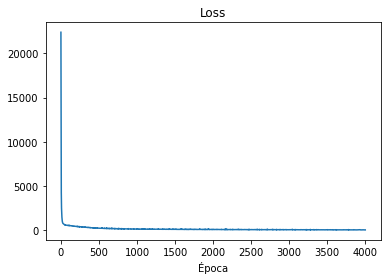

In [43]:
score = model.evaluate(x_test, y_test)
print(score)

fig, axs = pyplot.subplots(1)


x=history.history['loss']
axs.plot(x)
axs.set_title('Loss')
axs.set(xlabel='Época')

48/48 [==============================] - 0s 2ms/sample - loss: 601.1309 - mse: 601.1309
[601.1309000651041, 601.1309]


[Text(0.5, 0, 'Época')]

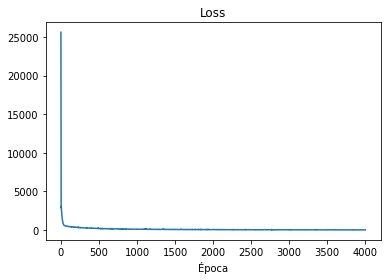

In [49]:
score = model.evaluate(x_test, y_test)
print(score)

fig, axs = pyplot.subplots(1)


x=history.history['loss']
axs.plot(x)
axs.set_title('Loss')
axs.set(xlabel='Época')

In [46]:
y_hat=model.predict(x_test[:5])
print(y_hat)
print(y_test[:5])

[[133.72511]
 [ 91.57149]
 [125.72498]
 [130.3217 ]
 [128.94284]]
69     119
190    107
181    134
9      165
127    139
Name: delta, dtype: int64


In [50]:
y_hat=model.predict(x_test[:5])
print(y_hat)
print(y_test[:5])


[[133.36688]
 [117.51667]
 [123.66793]
 [126.87264]
 [125.74094]]
69     119
190    107
181    134
9      165
127    139
Name: delta, dtype: int64


In [51]:
import pandas as pd

df2 = pd.read_csv('../datasets/dados_rnn.csv', sep=';')
df2
#status
#0 - concluiu o curso
#1 - desistente
#2 - tracado

,id_aluno,semestre,sexo,curso,financiador,media_final_nota,media_horas_online,media_reprovacao,media_trabalhos,media_foruns,status
0,5323,3,0,10,2,2.44,107.36,0.33,0.67,4.00,2
1,4674,3,1,5,1,2.44,50.28,1.67,2.33,7.33,2
2,3651,4,1,0,0,8.17,118.87,3.00,6.00,6.00,0
3,8877,4,1,8,2,7.55,69.27,1.75,6.00,5.00,0
4,1354,2,1,2,2,2.82,121.41,3.50,1.00,5.00,1
...,...,...,...,...,...,...,...,...,...,...,...
995,4541,4,0,1,0,9.09,106.87,2.25,6.00,2.50,0
996,5975,4,0,4,0,9.04,121.30,3.00,6.00,5.75,0
997,1949,1,0,5,0,1.57,155.71,0.00,6.00,6.00,1
998,5136,4,1,7,0,8.14,92.60,2.50,6.00,6.25,0


In [53]:

y=df2['status']
X=df2.drop(['status','id_aluno'], axis=1)
print(y.unique())
print(df2)
print(y.shape)
print(X.shape)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

[2 0 1]
     id_aluno  semestre  sexo  curso  financiador  media_final_nota  \
0        5323         3     0     10            2              2.44   
1        4674         3     1      5            1              2.44   
2        3651         4     1      0            0              8.17   
3        8877         4     1      8            2              7.55   
4        1354         2     1      2            2              2.82   
..        ...       ...   ...    ...          ...               ...   
995      4541         4     0      1            0              9.09   
996      5975         4     0      4            0              9.04   
997      1949         1     0      5            0              1.57   
998      5136         4     1      7            0              8.14   
999      2394         4     1      6            0              8.06   

     media_horas_online  media_reprovacao  media_trabalhos  media_foruns  \
0                107.36              0.33             0.67     

In [58]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=9))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convertendo labels em categorias one-hot encoding
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=3)

history = model.fit(x_train, one_hot_labels, epochs=300, batch_size=16)

Train on 800 samples
Epoch 1/300
800/800 [==============================] - 0s 586us/sample - loss: 2.0750 - accuracy: 0.6275
Epoch 2/300
800/800 [==============================] - 0s 287us/sample - loss: 0.9567 - accuracy: 0.7550
Epoch 3/300
800/800 [==============================] - 0s 288us/sample - loss: 0.6317 - accuracy: 0.8075
Epoch 4/300
800/800 [==============================] - 0s 287us/sample - loss: 0.4527 - accuracy: 0.8512
Epoch 5/300
800/800 [==============================] - 0s 284us/sample - loss: 0.4525 - accuracy: 0.8500
Epoch 6/300
800/800 [==============================] - 0s 281us/sample - loss: 0.3059 - accuracy: 0.8775
Epoch 7/300
800/800 [==============================] - 0s 286us/sample - loss: 0.3057 - accuracy: 0.8900
Epoch 8/300
800/800 [==============================] - 0s 282us/sample - loss: 0.2838 - accuracy: 0.8838
Epoch 9/300
800/800 [==============================] - 0s 282us/sample - loss: 0.2642 - accuracy: 0.9000
Epoch 10/300
800/800 [============

800/800 [==============================] - 0s 282us/sample - loss: 0.0950 - accuracy: 0.9625
Epoch 79/300
800/800 [==============================] - 0s 283us/sample - loss: 0.0984 - accuracy: 0.9588
Epoch 80/300
800/800 [==============================] - 0s 281us/sample - loss: 0.1023 - accuracy: 0.9563
Epoch 81/300
800/800 [==============================] - 0s 283us/sample - loss: 0.0963 - accuracy: 0.9588
Epoch 82/300
800/800 [==============================] - 0s 284us/sample - loss: 0.1046 - accuracy: 0.9525
Epoch 83/300
800/800 [==============================] - 0s 277us/sample - loss: 0.0929 - accuracy: 0.9625
Epoch 84/300
800/800 [==============================] - 0s 279us/sample - loss: 0.1024 - accuracy: 0.9550
Epoch 85/300
800/800 [==============================] - 0s 282us/sample - loss: 0.0824 - accuracy: 0.9638
Epoch 86/300
800/800 [==============================] - 0s 280us/sample - loss: 0.1057 - accuracy: 0.9563
Epoch 87/300
800/800 [==============================] - 0s 

800/800 [==============================] - 0s 288us/sample - loss: 0.0516 - accuracy: 0.9725
Epoch 155/300
800/800 [==============================] - 0s 289us/sample - loss: 0.0475 - accuracy: 0.9800
Epoch 156/300
800/800 [==============================] - 0s 289us/sample - loss: 0.0443 - accuracy: 0.9837
Epoch 157/300
800/800 [==============================] - 0s 287us/sample - loss: 0.0599 - accuracy: 0.9787
Epoch 158/300
800/800 [==============================] - 0s 292us/sample - loss: 0.0486 - accuracy: 0.9775
Epoch 159/300
800/800 [==============================] - 0s 299us/sample - loss: 0.0457 - accuracy: 0.9825
Epoch 160/300
800/800 [==============================] - 0s 293us/sample - loss: 0.0497 - accuracy: 0.9812
Epoch 161/300
800/800 [==============================] - 0s 287us/sample - loss: 0.0366 - accuracy: 0.9875
Epoch 162/300
800/800 [==============================] - 0s 287us/sample - loss: 0.0666 - accuracy: 0.9762
Epoch 163/300
800/800 [============================

800/800 [==============================] - 0s 280us/sample - loss: 0.0192 - accuracy: 0.9912
Epoch 231/300
800/800 [==============================] - 0s 279us/sample - loss: 0.0361 - accuracy: 0.9875
Epoch 232/300
800/800 [==============================] - 0s 279us/sample - loss: 0.0208 - accuracy: 0.9937
Epoch 233/300
800/800 [==============================] - 0s 278us/sample - loss: 0.0268 - accuracy: 0.9912
Epoch 234/300
800/800 [==============================] - 0s 277us/sample - loss: 0.0259 - accuracy: 0.9900
Epoch 235/300
800/800 [==============================] - 0s 280us/sample - loss: 0.0164 - accuracy: 0.9950
Epoch 236/300
800/800 [==============================] - 0s 281us/sample - loss: 0.0338 - accuracy: 0.9837
Epoch 237/300
800/800 [==============================] - 0s 282us/sample - loss: 0.0171 - accuracy: 0.9900
Epoch 238/300
800/800 [==============================] - 0s 282us/sample - loss: 0.0116 - accuracy: 0.9962
Epoch 239/300
800/800 [============================

200/200 [==============================] - 0s 455us/sample - loss: 1.0225 - accuracy: 0.9200
[1.022503177896142, 0.92]


[Text(0.5, 15.000000000000028, 'Época')]

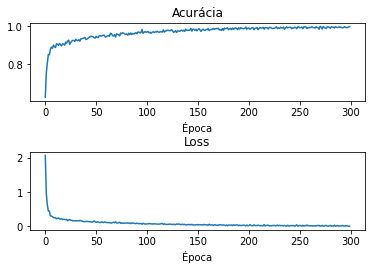

In [59]:
one_hot_label_test = keras.utils.to_categorical(y_test, num_classes=3)
score = model.evaluate( x_test, one_hot_label_test)

print(score)

fig, axs = pyplot.subplots(2)

fig.tight_layout(pad=3.0)

x=history.history['accuracy']
axs[0].plot(x)
axs[0].set_title('Acurácia')
axs[0].set(xlabel='Época')

x=history.history['loss']
axs[1].plot(x)
axs[1].set_title('Loss')
axs[1].set(xlabel='Época')

In [60]:
y_hat=model.predict(x_test[:5])
print(y_hat)
print(y_test[:5])

[[1.0000000e+00 2.0007394e-13 5.0116999e-21]
 [1.0000000e+00 8.8747343e-15 1.2234409e-16]
 [1.0000000e+00 1.2597597e-11 2.8722256e-13]
 [1.0000000e+00 7.8643721e-13 6.3672699e-20]
 [9.9993372e-01 6.6239234e-05 1.2794239e-13]]
521    0
737    0
740    0
660    0
411    0
Name: status, dtype: int64
